<div class="pagebreak"></div>

# Iteration
In previous notebooks, we discussed control statements (e.g., `if`) to make decisions on which block of code to execute. 

From a structured programming point of view, three basic building blocks exist to construct algorithms:
- sequence (executing statements one after another)
- selection (making decisions, control statements, `if`)
- iteration (repeatedly executing parts of a program - also known as repetition)

This notebooks examines the last basic building block - iteration.

Fortunately for us, computers do not tire or complain of doing the same thing time and time again.  Many programming tasks are naturally repetitive.  For example, if we did not know the formula for compounding interest, we could simply execute the base calculation (adding the interest earned to the principal) a given number of times.  Painfully boring for us, just something else for a computer to do.

Going back to the Seven Steps, in the third step, we looked for ways to generalize our algorithm.  Finding repetitive patterns or behavior is another tool in this process.

Generally speaking, two basic types of iteration exist:
1. loop continues to be run as long a certain condition is true
2. Set of instructions is repeated a fix number of times.

In this notebook, we will examine `while` statement as that is how Python implements the first type and then the `for` loop which roughly implements the second type.

## Looping with while
The while loop is a relatively simple looping mechanism that allows us to repeat a code block as long as the condition for the while statement remains `True`.

Suppose you are a fan of _Getting Things Done_ and you maintain a list a current "to do items" while you are at your computer.  A pseudocode example for processing that list might look like - 
```
while todo_list is not empty
  - remove the first "todo" from the list
  - process the "todo"
```
So the condition in this example is "todo_list is not empty".  In Python, we could simply use ```while todo_list:``` as todo_list evaluates to ```True``` if it has one or more entries and to `False` if it has zero entries.  Within each iteration of the loop, we remove an item from the list - so hopefully we will eventually finish that list.

The while loop has the following syntax:
```
while condition:
    block
```
If the condition evaluates to `True`, then the statements in the block are executed.  After the block executes, the entire statement repeats with evaluating the condition.  This repeats indefinitely until the condition evaluates to `False` or the block causes the flow of control to break out of the while statement.

![](images/whileStatment.png)

Here's a simple example that counts from 1 to 5:

In [ ]:
i = 1
while i < 6:
    print(i)
    i = i + 1

As with the `if` statement, the condition is any expression that evaluates to `True` or `False`. As these notebooks have shown, this includes numbers, strings, lists, and tuples.

## Break and Continue
As with many other programming languages, Python has two statements that can affect the execution of the loop from within the block (as opposed to just the while condition).

With the `break` statement, execution immediately exits the block and execution proceeds with the statement after the loop.

In the following example, we add a check that if i is divisible by 3, we exit the loop immediately.

In [ ]:
i = 1
while i < 6:
    if (i % 3 == 0): 
        break
    else:
        print(i)
        i = i + 1
print ("After the while loop")

Rather than exiting the loop immediately, the `continue` statement exits the current loop, but resumes with executing the condition at the top of the loop.

In [ ]:
i = 1
while i < 6:
    if (i % 2 == 0): 
        i = i +1
        continue
    else:
        print(i)
        i = i +1
    
print ("After the while loop")

In the above loop, we had to change how we updated the variable _i_ as compared to the prior example.  If we had not changed the value for i before the continue statement, the program would have executed forever as the condition would have never changed.  See what happens when you execute this next code block.  You can stop the execution by clicking the stop button.

In [ ]:
i = 1
while i < 6:
    if (i % 2 == 0): 
        continue
    else:
        print(i)
        i = i +1
    
print ("After the while loop")

To avoid infinite loops such as the above, the statements within the `while` block should occur such that the test condition eventually evaluates to `False`.

## While Example: Fibonacci Series
The following code fragment prints out the first nine numbers of a [Fibonacci series](https://en.wikipedia.org/wiki/Fibonacci_number) starting at zero.

Source: [Python Tutorial](https://docs.python.org/3/tutorial/introduction.html#first-steps-towards-programming)

In [1]:
a, b = 0, 1
while a < 20:
    print (a,end=', ')
    a, b = b, a + b
print (a)

0, 1, 1, 2, 3, 5, 8, 13, 21


There's several interesting things present in these five lines of code:
- Lines 1 and 4 both demonstrate parallel (multiple) assignment.  The expressions on the right side of the assignment statement ```=``` are evaluated left to right.  After all of the expressions have been evaluated, the result of each expression is then assigned to the corresponding variable on the left hand side.
- We show a ```while``` loop, which executes as long as the condition (```a < 20```) remains true.  
- Notice that final ```print()``` statement in these examples prints the newline character. 
- This loop is an example of a _fencepost loop_.  Notice in the loop we print a number followed by a comma.  However, we don't want the last number printed to have a comma, and hence, treat it specially outside of the loop.  That last statement is the closing "post" in a fence line.

![](images/fencepost.png)

Many different approaches exist to solve the fencepost loop issue.  We can choose to special case the first "post". We can also add an `if` statement to print the separator after the first occurrence in the loop.

In [ ]:
a, b = 0, 1
print (a, end='')
while a < 20:
    print (",",b,end='')
    a, b = b, a + b
print ()

In [ ]:
a, b = 0, 1
while a < 22:  # logic change to show "21"
    if (a >0):
        print (', ',end='')
    print (a,end='')
    a, b = b, a + b
print()

## The Infinite While Loop
A relative common pattern in iteration is too loop forever.  In Python, is would look something like
<pre>
while True:
    <i>do something interesting</i>
</pre>

For a web server, the pseudocode for the application may look something like -
<i><pre>
    initialize system
    loop forever
        wait for url request
        process url request
</pre></i>
A game engine may have an overall control such as 
<i><pre>
    initialize game
    loop forever
        process any received user input
        status = update game state
        if status equals "stop", break out of loop
        draw game state 
    process end of game
</pre></i>

<div style="border: 3px solid black;padding: 10px; border-radius: 10px;">
From a design point of view, this pseudocode exemplifies a top-down design approach.  Most of the steps don't have enough detail to convert directly to code.  When this occurs, we then need to look at breaking down the statements into more specific tasks until the translation to code becomes straightforward.
<br><br>
For the webserver, <i>initialize system</i> might become
<i><pre>
read configuration file
establish logging
create server socket to listen for requests
</pre></i>
</div>

### Loop and a half problem
Another common occurrence with while loops is the "loop and a half" problem.  In these cases, we need to perform some processing for an indeterminate number of iterations.

Example: Continually read grades from a user until they enter a negative value which signifies they are done entering grades. (The negative value functions as a sentinel, which is a special value to mark the end of series of inputs or values. Sentinels need to be distinctive from regular values in the series.)

One approach would be to read the first input before entering the loop:

In [ ]:
total = 0
num_entries = 0

grade = int(input("Enter a grade: "))
while grade > 0:
    total += grade
    num_entries += 1
    grade = int(input("Enter a grade: "))

if num_entries > 0:
    print("Average:",total/num_entries)
else:
    print("no grades entered")

The downside to the above solution is that we have repeated code outside and inside the loop to enter grades. This example is relatively straightforward, but what if this repeated code was more complex? What happens when it needs to be changed?  What if it was only changed in one location?  

An alternate approach is to use a "loop and a half structure". This structure breaks out of the loop halfway when a particular condition is reached.

In [ ]:
total = 0
num_entries = 0

while True:
    grade = int(input("Enter a grade: "))
    if grade < 0:
        break
    total += grade
    num_entries += 1

if num_entries > 0:
    print("Average:",total/num_entries)
else:
    print("no grades entered")

## The for loop
Python's for loop differs from the for loops in other languages such a C, although it is roughly comparable to Java's for each loop.

With this looping statement, we iterate over the items of an iterable - the sequences we have seen (string, list, and tuple) are iterables. 

The for loop has the following syntax:
```
for variable in iterable:
    block
```

In [ ]:
acc_schools = ["Duke", "Notre Dame", "UNC", "NCSU", "Wake Forest", "Clemson"]
for school in acc_schools:
    print(school)

As with the while loop, the break and continue statements can be used within for statements.

## Else - Was break used?
Fairly unique to Python, the `else` statement can be added to the end of both while and for loops.  The else block will only be called if the break statement was not called.

A typical use case for the else clause is searching for a particular item in a list.  The loop would break as soon as the item is found.  However, if the item is not found, then there might be something else that needs to be executed.

In [ ]:
acc_schools = ["Duke", "Notre Dame", "UNC", "NCSU", "Wake Forest", "Clemson"]
for school in acc_schools:
    if school == "Wake Forest":
        break
    print("searching")
else:
    print("Not found - break was not called")

In [ ]:
acc_schools = ["Duke", "Notre Dame", "UNC", "NCSU", "Wake Forest", "Clemson"]
for school in acc_schools:
    if school == "Miami":
        break
    print("searching")
else:
    print("Not found - break was not called")

In [ ]:
x = 1
while x < 3:
    print(x)
    x = x + 1
    if x % 5 == 0:
        break
else:
    print("else - the loop ended after the condition x < 3 evaluated to False, break was not called")

## Generating Number Sequences: range()
Python offers a built-in function `range` to generate a stream of numbers.  We call `range()` in a similarly manner as how we used slices:  <code>range(<i>start</i>, <i>stop</i>, <i>step</i>)</code>.

Only _stop_ is required.  If _start_ is omitted, the range starts at 0.  The range ends just before the value of stop.  Step has a default value of 1, but we can use any nonzero integer.

In [ ]:
for x in range(0, 4):
    print(x)

In [ ]:
for x in range(4, 0, -1):
    print(x)

Using the above code,  use `range()` with just a stop number.

Try some more examples yourself:

In [ ]:
# Enter a range from 10 to 0, skipping by 2's
for x in range():
    print(x)

# Enter a ranger from 1 to 30, skipping by 3's
for x in range ():
    print(x)

From a space perspective, the numbers are not actually produced until that number is needed - this allows us to create arbitrarily large ranges. However, if you create a list immediately from a range, then all of the numbers are generated and stored in that list.

In [ ]:
list(range(1,11))

## Indexes and Values with the for loop
Generally speaking, it is bad practice to explicitly use an index variable to iterate through a squence.  However, use cases do exist where the programmer needs both the index and value of an item while looping. For this, we can use the built-in function `enumerate()` to wrap the iterable in a for loop.

In [2]:
acc_schools = ["Duke", "Notre Dame", "UNC", "NCSU", "Wake Forest", "Clemson"]
for idx, school in enumerate(acc_schools):
    print("{}: {}".format(idx,school))

0: Duke
1: Notre Dame
2: UNC
3: NCSU
4: Wake Forest
5: Clemson


## Case Study: Revisiting the Systematic Investment Plan
In the notebook on Basic Input and Output, we explored developing and writing the corresponding code to find the future value of a systematic investment Plan.  In that case, we assumed we could use an existing and well-known formula.  However, what if we decided to perform the calculations manually?  At the time, we did not have any mechanisms to repeat code.  If we had a 100 payments, we would have had a 100 statements, each one adding a payment and the corresponding interest earned. However, with the iteration statements in this notebook, a Python script could easily do that work.

Problem: Write a function called future_value_sytematic_investment that computes the future value of a SIP for a given payment, annual interest rate, number of payments, and the number of periods per year.

Let's repeat the Seven Steps design process:[1]
![](images/sevensteps.png)

So let's manully do this for 3 periods, assuming 10% interest rate per period, and $100 per payment.
<pre>
iteration 1: total = payment 
iteration 2: total = payment + previous total + previous total * interest
iteration 3: total = payment + previous total + previous total * interest
</pre>
hmmm.... looks like our iteration states are pretty much the same, but can we make the first one look like the others?
<pre>
iteration 0: total = 0 
iteration 1: total = payment + previous total + previous total * interest  
             (Note: The previous total = 0, so total = payment as before
iteration 2: total = payment + previous total + previous total * interest
iteration 3: total = payment + previous total + previous total * interest
</pre>
We can also factor out the previous total in each iteration:
<pre>
total = payment + previous total * (1 + interest)
</pre>

Now, how will this work for different values? We probably will still have overflow errors for large interest rates.  However, we no longer are doing any division, so a 0% interest rate is no longer a problem.  Negative interest rates smaller than -1 may cause issues. The number of periods per year needs to more more than 0.

<pre>
inputs: payment amount, annual interest rate, total payments, periods per year
output: future value
algorithm:
    periodic rate = annual interest rate / periods per year
    result = 0
    for total payments:
        result = payment + result  * (1+periodic rate)
    return result   
</pre>


Let's move on to coding:

In [ ]:
def future_value_sytematic_investment(payment_amount, annual_interest_rate, 
                                     num_payments, num_periods_per_year):
    periodic_interest_rate = annual_interest_rate / num_periods_per_year
    result = 0
    for x in range(num_payments):
        result = payment + result * (1+periodic_interest_rate)
        print result
    return result

fv = future_value_sytematic_investment(100,10,5,1)
print("Future value: ${:,.2}".format(fv))

sigh ... our intermediate printing caused an error.  This is why debuggers are a good thing ...

In [ ]:
def future_value_sytematic_investment(payment, annual_interest_rate, 
                                     num_payments, num_periods_per_year):
    periodic_interest_rate = annual_interest_rate / num_periods_per_year
    result = 0
    for x in range(num_payments):
        result = payment + result * (1+periodic_interest_rate)
        print(result)
    return result

fv = future_value_sytematic_investment(100,.10,5,1)
print("Future value: ${:,.2f}".format(fv))

In [ ]:
print("Future value: ${:,.2f}".format(future_value_sytematic_investment(100,.1,5,12)))

In [ ]:
print("Future value: ${:,.2f}".format(future_value_sytematic_investment(100,-5,5,1)))

Well, hopefully, the losses won't be too great as large negative numbers are problematic. We'll learn some methods to make our code more robust in a few notebooks. 

Now, we need to go back and clean up our function to remove that test print statement. We should also add docstrings to provide help on this function.

In [ ]:
def future_value_sytematic_investment(payment, annual_interest_rate, 
                                     num_payments, num_periods_per_year):
    """Computes the future value of a systematic investment plan

    Args:
      payment: How much money is put into the plan each period?
      annual_interest_rate: What is the assumed interest rate for the plan?
      num_payments: How many payments will the investor make in total?
      num_periods_per_year: How many payments/periods are there in a year

    Returns:
      future value of the investment
    """
    periodic_interest_rate = annual_interest_rate / num_periods_per_year
    result = 0
    for x in range(num_payments):
        result = payment + result * (1+periodic_interest_rate)
    return result

In [ ]:
print("Future value: ${:,.2f}".format(future_value_sytematic_investment(100,0.07,360,12)))

## Case Study: Monte Carlo Simulation
A common approach to determine whether or not an investment strategy will produce sufficient funds for retirement is to use a [Monte Carlo Simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method) of investment returns.  

We can apply this method to our `future_value_systematic_investment()` function.  However, rather than assuming a fixed interest rate, we can random select return values.  One possibility would be to select a random historical return of the DJIA. Another possibility is to use random numbers from a Gaussian distribution defined with a given mean and standard deviation.  

Let's look at modifying our future value method to instead use a random interest rate annually.  We will also simplify our method such that we only use one interest rate per year.

Jotting down some notes, we now have inputs: payment, num_payments, rate_mean, rate_stdev
<br>Process looks to be the same, except periodic_interest rate is now a random value.

We need to look if we can make this process even more generic. How have other people produced these calculations?  In some situations, they assume an initial principal.  Let's add that too, but we can make this an optional parameter, defaulting the amount to 0.

In [3]:
import random

In [4]:
def future_value_sytematic_investment_random(payment, num_payments, rate_mean, rate_stdev,
                                            initial_principal = 0.0):
    """Computes the future value of a systematic investment plan, but use random 
       interest rates from a gaussian distribution.

    Args:
      payment: How much money is put into the plan annually?
      num_payments: How many payments will the investor make in total?
      rate_mean: assumed mean of the interest rate
      rate_stdev: assumed standard deviation for the interest rate
      initial_principal: what is the initial amount (value) in the account? Defaults to 0

    Returns:
      future value of the investment
    """
    result = initial_principal
    for x in range(num_payments):
        interest_rate = random.gauss(rate_mean, rate_stdev)
        result = payment + result * (1+interest_rate)
    return result

In [5]:
print("Future value: ${:,.2f}".format(future_value_sytematic_investment_random(1200,30,0.07,.2)))

Future value: $46,894.82


As we run the above cell multiple times, we will get a wide number of different answers.  Some will be larger than the \$121,000 we computed before, other results smaller.  We can't just simply take the number we like the best. 

So to properly perform this simulation, we need to perform this experiment thousands of times and then analyze the results.

In [6]:
results = []
for x in range(10000):
    results.append(future_value_sytematic_investment_random(1200,30,0.07,.2))

In [7]:
mean = sum(results)/len(results)
print(mean)

112743.96273552651


In [8]:
returns_sorted= sorted(results)

median = returns_sorted[len(returns_sorted)//2] if len(returns_sorted)%2 == 1 else (returns_sorted[len(returns_sorted)//2] + returns_sorted[1 +len(returns_sorted)//2])/2
print(median)

85237.28353448064


### Visualize Results
Here we'll bring in a visualization library, [seaborn](https://seaborn.pydata.org/), to see the distribution of future values as well as the empirical cumulative distribution.

[Text(0.5, 0, 'Future value'), Text(0, 0.5, 'Count')]

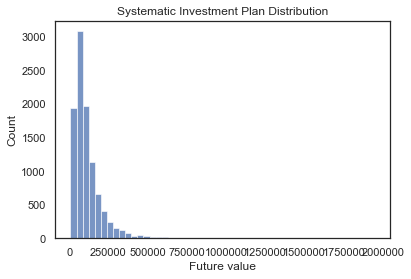

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
axes = sns.histplot(results,bins=50)
axes.set_title("Systematic Investment Plan Distribution")
axes.ticklabel_format(style='plain', axis='x',useOffset=False)
axes.set(xlabel='Future value', ylabel='Count')

(0.0, 500000.0)

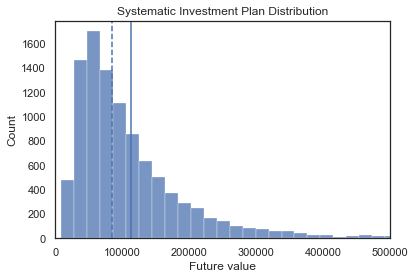

In [10]:
axes = sns.histplot(results,bins=100)
axes.set_title("Systematic Investment Plan Distribution")
axes.ticklabel_format(style='plain', axis='x',useOffset=False)
axes.set(xlabel='Future value', ylabel='Count')
axes.axvline(mean)        # draw a vertical bar for the mean
axes.axvline(median,linestyle='--')  # vertical bar for the median, dashed
axes.set_xlim(0, 500000)  # Distribution is long-tailed,  lets chop off those rare values

(0.0, 200000.0)

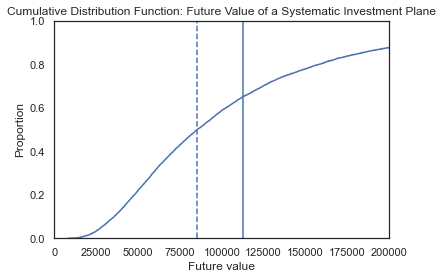

In [11]:
axes = sns.ecdfplot(results)
axes.set_title("Cumulative Distribution Function: Future Value of a Systematic Investment Plane")
axes.ticklabel_format(style='plain', axis='x',useOffset=False)
axes.set(xlabel='Future value')
axes.axvline(mean)        # draw a vertical bar for the mean
axes.axvline(median,linestyle='--')  # vertical bar for our median, dashed line
axes.set_xlim(0, 200000)  # limit to focus on the lower returns

## Exercises
1. Write a function greater_than_x that takes two parameters: a list and a number.  The function should return a new list consisting of any entries in the list greater than the number.  Assume all entries in the list are numbers.
2. Given this list of closing stock prices, create functions to compute the mean, median, and standard deviation.  Assume that we have a sample, but you can also write your function to make this an optional flag.
```
stock_prices = [ 123.75, 124.38, 121.78, 123.24, 122.41, 121.78, 127.88, 127.81, 128.70, 131.88]
```
3. Generate a range that produces the following number 10,12,14,16,18, and 20.
4. Create a guessing game.  Generate a random number between 1 and 100.  Have the user guess.  Print a message if the guess is too high, too low, or correct.  Repeat the user guessing until the correct answer is guessed.  Print the number of guesses.  You can use the following code to create the random number:<br>
```
import random
number = random.randint(1, 100)
```

5. Produce a compound interest chart for for 10 years using 1 to 15%.  The x-axis should be the interest with the y-axis being the years.  The numbers should be right justified.  Assume $100.00 is the initial principle.
6. Read two strings from the user.  The first string is a text block.  The second string is a character, series of characters, or word to find within each word of the text block.  You should split the first string by whitespace and then keep only those words that contain the second string.  Join the remaining words together into a string, separated by a comma.
7. Given the following lists, generated random sentences by combining random words from each list in this order: _article noun verb preposition artice noun_.<br>
```
article = ["the", "a", "one", "some", "any"]
noun = ["boy", "girl", "dog", "town", "car"]
verb = ["drove", "jumped", "ran", "walked", "skipped"]
preposition = ["to", "from", "over", "under", "on"]
```
The first word of the sentence should be capitalized and the sentence should end with a period. You can get a random element from a list with the following code: (the import statement only needs to occur once)<br>
```
import random
random.choice(noun)
```
How would you repeat this 5 times?

8. Write a function that converts an integer to a string with a specific base.<br>
   `def convert_int_to_base(i, base=10):`

## References
[1] Andrew D. Hilton, Genevieve M. Lipp, and Susan H. Rodger. 2019. _Translation from Problem to Code in Seven Steps_. In Proceedings of the ACM Conference on Global Computing Education (CompEd '19). Association for Computing Machinery, New York, NY, USA, 78–84. https://doi-org.prox.lib.ncsu.edu/10.1145/3300115.3309508